In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [3]:
red_wine_df = pd.read_csv("Resources/winequality-red.csv", sep=";")
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print(red_wine_df["quality"].min())
print(red_wine_df["quality"].max())

3
8


In [5]:
bins = [3, 5.5, 8]
labels = [0, 1]  # 0 for good quality, 1 for bad quality

red_wine_df['wine_quality'] = pd.cut(red_wine_df['quality'], bins=bins, labels=labels, include_lowest=True)
red_wine_df['wine_quality'] = red_wine_df['wine_quality'].astype(int)
red_wine_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [6]:
red_wine_df.drop(columns="quality")
red_wine_df["wine_quality"].value_counts()

1    855
0    744
Name: wine_quality, dtype: int64

Shipra's Code (test and apply later - https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = red_wine_df.drop('wine_quality', axis=1)  # Features
y = red_wine_df['wine_quality']  # Target variable


# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create a Random Forest Regressor model
rf_model = RandomForestClassifier(n_estimators=500, random_state=45)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       213

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



Logistic Regression on Binary Data

In [8]:

from sklearn.linear_model import LogisticRegression

# Separate features (X) and target variable (y)
X = red_wine_df.drop('wine_quality', axis=1)  # Features
y = red_wine_df['wine_quality']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)


Accuracy: 1.0
Confusion Matrix:
[[141   0]
 [  0 179]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       141
           1       1.00      1.00      1.00       179

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



Clustering Scaled Data

In [9]:
red_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [10]:
red_wine_df_copy = red_wine_df.copy()
red_wine_df_copy = red_wine_df_copy.drop(columns=["quality", "wine_quality"])
red_wine_df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
red_wine_df_copy.hvplot.line(
    width=800,
    height=400,
)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [12]:
red_wine_scaled = StandardScaler().fit_transform(red_wine_df_copy)

red_wine_scaled[:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611]])

In [13]:
red_wine_scaled_df=pd.DataFrame(red_wine_scaled, columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

red_wine_scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [15]:
k_original = list(range(1,11))

inertia_original = []


for i in k_original:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(red_wine_scaled_df)
    inertia_original.append(k_model.inertia_)

In [16]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data_original = {"k":k_original,"inertia":inertia_original}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_original = pd.DataFrame(elbow_data_original)

# Display the DataFrame
elbow_df_original.head()

,k,inertia
0,1,17589.000000
1,2,14330.119811
2,3,12629.974592
3,4,11294.210161
4,5,10155.509585


In [17]:
original_elbow_plot = elbow_df_original.hvplot.line(
    x="k",
    y="inertia",
    title="K-Means Elbow Curve",
    xticks=k_original
)

original_elbow_plot

:Curve   [k]   (inertia)

In [18]:
model_1 = KMeans(n_clusters=7, random_state=1)

In [19]:
model_1.fit(red_wine_scaled_df)

KMeans(n_clusters=7, random_state=1)

In [20]:
model_1.feature_names_in_ #zip with cluster centers to identify separated clusters

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters_1 = model_1.predict(red_wine_scaled_df)

# Print the resulting array of cluster values.
clusters_1

array([4, 4, 4, ..., 1, 1, 3], dtype=int32)

In [22]:
red_wine_scaled_df_copy = red_wine_scaled_df.copy()
red_wine_scaled_df_copy["wine_clusters"]=clusters_1

red_wine_scaled_df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_clusters
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,4
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,4
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,4
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,4


In [23]:
original_scaled_plot = red_wine_scaled_df_copy.hvplot.scatter(
    x="citric acid",
    y="residual sugar",
    by="wine_clusters",
    title = "K-Means Clustering"
)

original_scaled_plot

:NdOverlay   [wine_clusters]
   :Scatter   [citric acid]   (residual sugar)

In [24]:
#Test PCA method

pca = PCA(n_components=2)

# fit and transform the scaled data
red_wine_pca = pca.fit_transform(red_wine_scaled_df)

# pca dataframe results
red_wine_pca_df = pd.DataFrame(data=red_wine_pca, columns=['Principal Component 1', 'Principal Component 2'])
red_wine_pca_df['wine_clusters'] = clusters_1  # Add the cluster information

# visualization with an hv scatterplot 
pca_plot = red_wine_pca_df.hvplot.scatter(
    x='Principal Component 1',
    y='Principal Component 2',
    by='wine_clusters',
    title='PCA for K-Means Clustering'
)

pca_plot

:NdOverlay   [wine_clusters]
   :Scatter   [Principal Component 1]   (Principal Component 2)

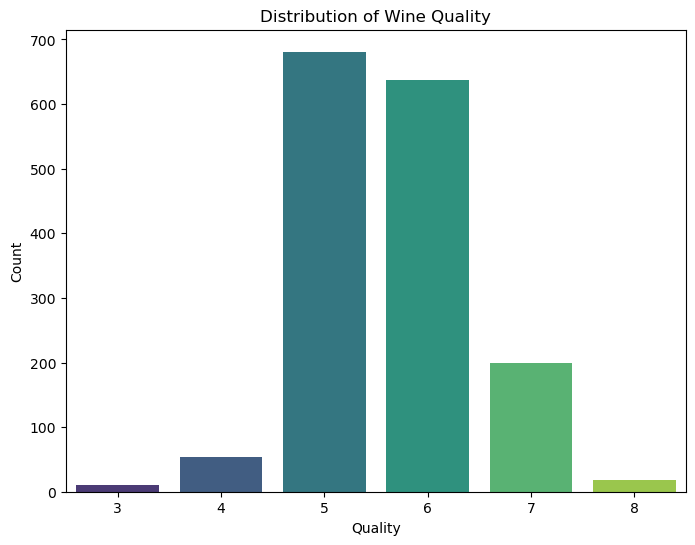

In [45]:
import seaborn as sns

# Distribution of Wine Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=red_wine_df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()


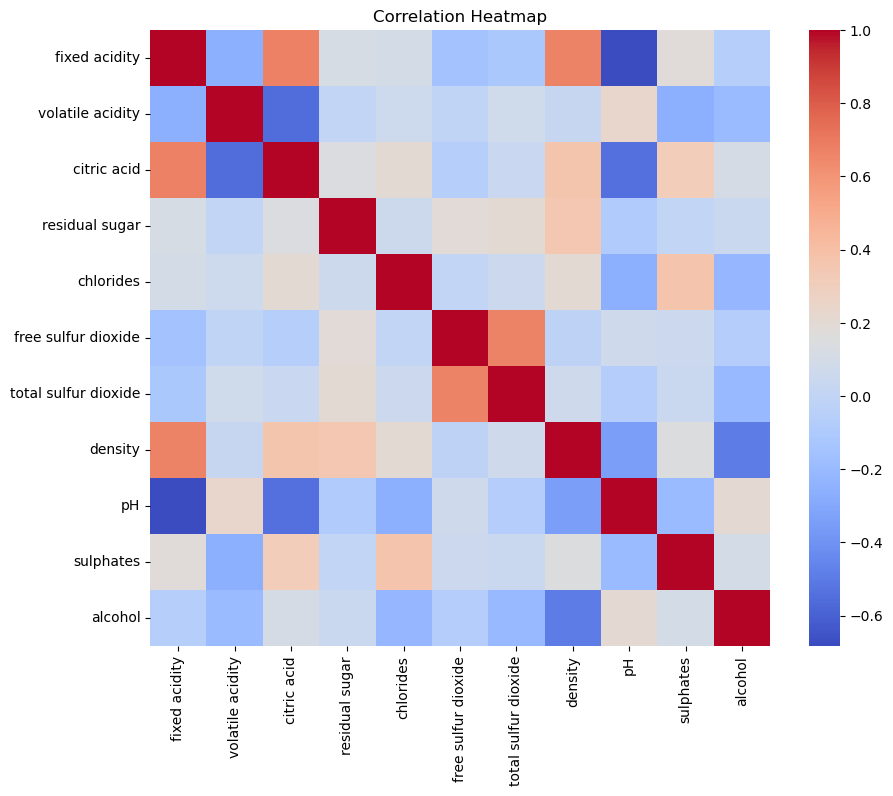

In [39]:
# Correlation Heatmap
correlation_matrix = red_wine_scaled_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


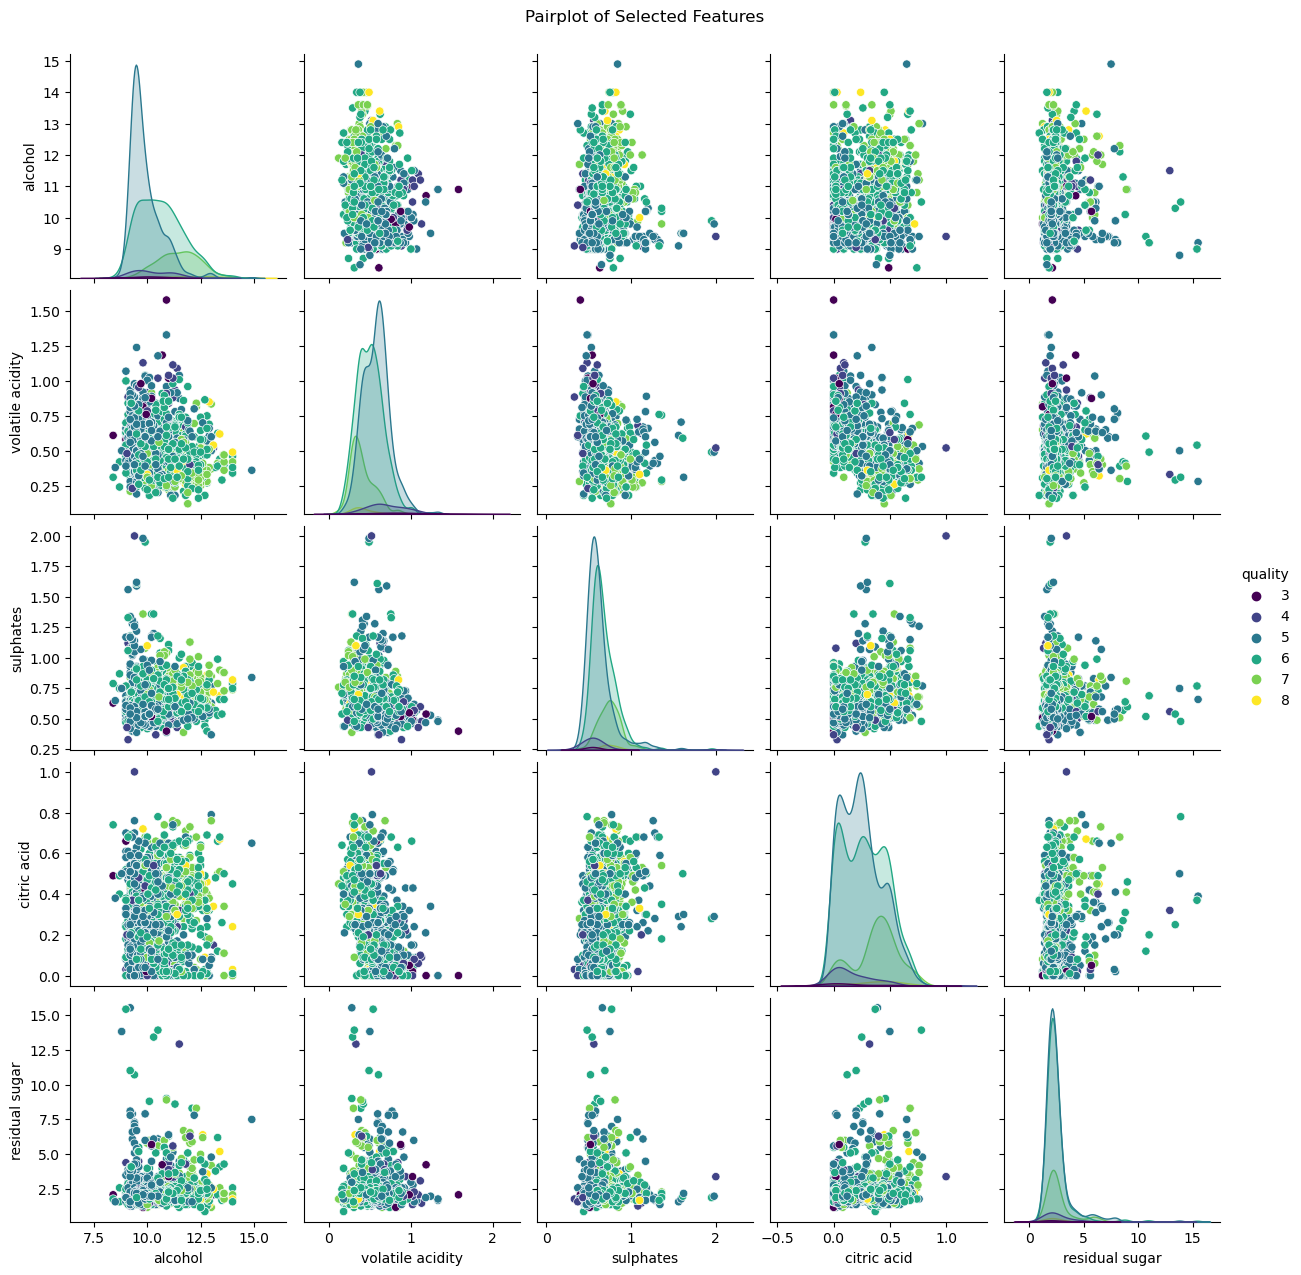

In [41]:
# Pairplot for Selected Features
selected_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'residual sugar', 'quality']
sns.pairplot(red_wine_df[selected_features], hue='quality', palette='viridis')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

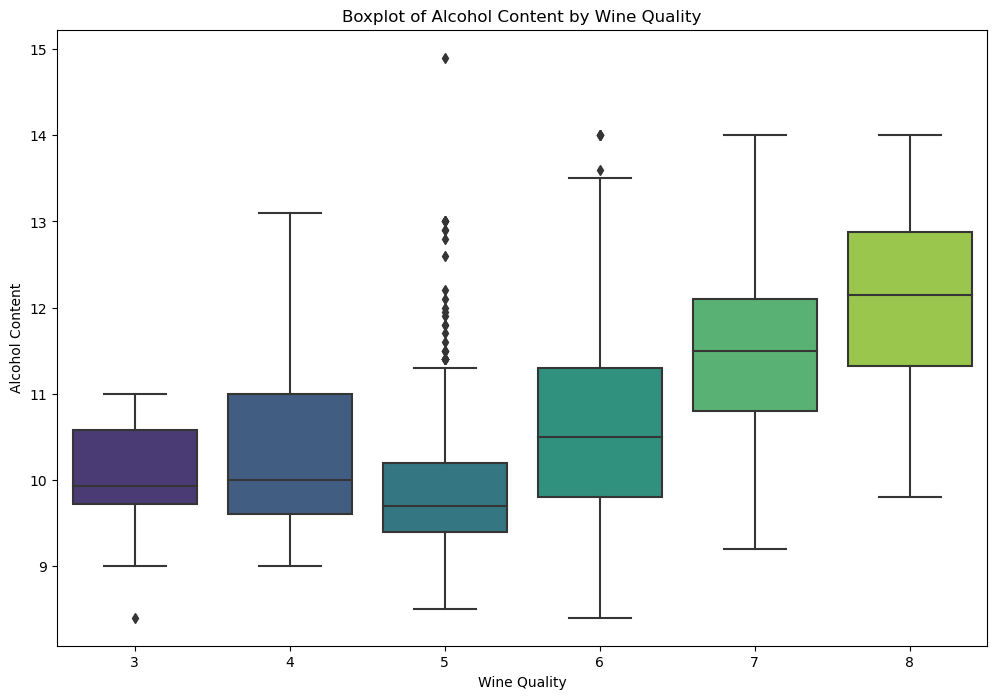

In [43]:
# Boxplot for to seee correlation between alcohol content and quality 
plt.figure(figsize=(12, 8))
sns.boxplot(x='quality', y='alcohol', data=red_wine_df, palette='viridis')
plt.title('Boxplot of Alcohol Content by Wine Quality')
plt.xlabel('Wine Quality')
plt.ylabel('Alcohol Content')
plt.show()